#Electric Vehicle Range Analysis: Trends by Make, Type, and Model Year

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive')
zip_path = '/content/drive/My Drive/Colab Notebooks/EV-data.zip'

#Extract Files
extract_path = '/content/data'
with zipfile.ZipFile(zip_path, 'r') as zip_file:
  zip_file.extractall(extract_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
from tabulate import tabulate

data = pd.read_csv('/content/data/Electric_Vehicle_Population_Data.csv')

print(data.info())
print(tabulate(data.head(10), headers="keys", tablefmt="pretty"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

### Clean the data by dropping null values


In [ ]:
data.isnull().sum()
data.dropna(inplace=True)

## Electric Vehicle Type Popularity

####Electric Vehicle range by EV type

<ipython-input-4-4e489c18ba80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Vehicle Type', y='Electric Range', data=avg_range_by_type, palette='viridis')


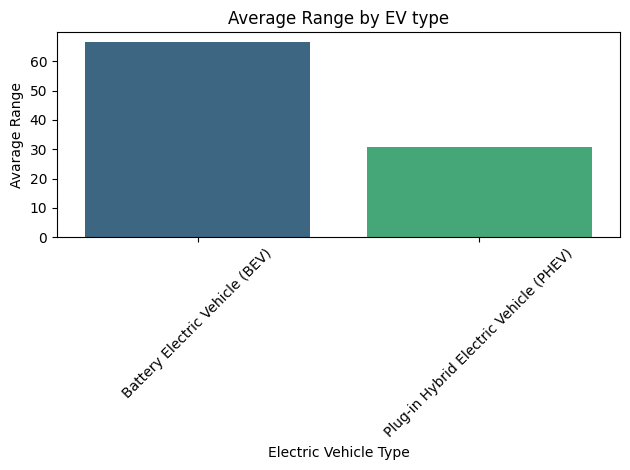

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_range_by_type = data.groupby('Electric Vehicle Type')['Electric Range'].mean().reset_index()

sns.barplot(x='Electric Vehicle Type', y='Electric Range', data=avg_range_by_type, palette='viridis')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Avarage Range')
plt.title('Average Range by EV type')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

####Average EV range by EV_type

<ipython-input-6-dad7529b6175>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Range', y='Make', data=avg_range_by_model, palette = 'viridis')


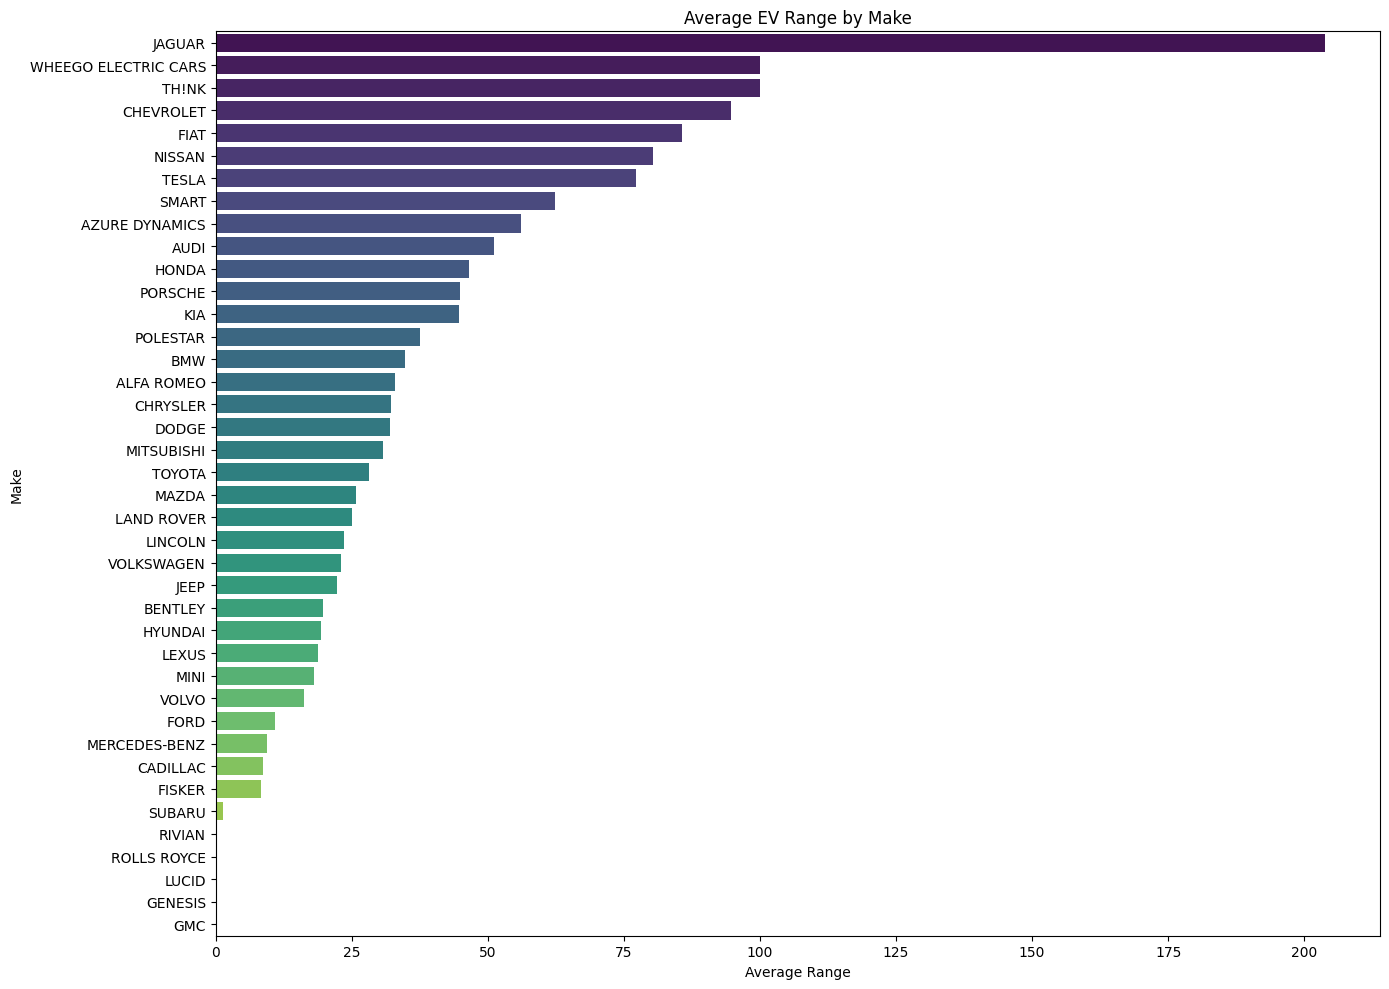

In [ ]:
avg_range_by_model = data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,10))
sns.barplot(x='Electric Range', y='Make', data=avg_range_by_model, palette = 'viridis')
plt.xlabel('Average Range')
plt.ylabel('Make')
plt.title('Average EV Range by Make')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

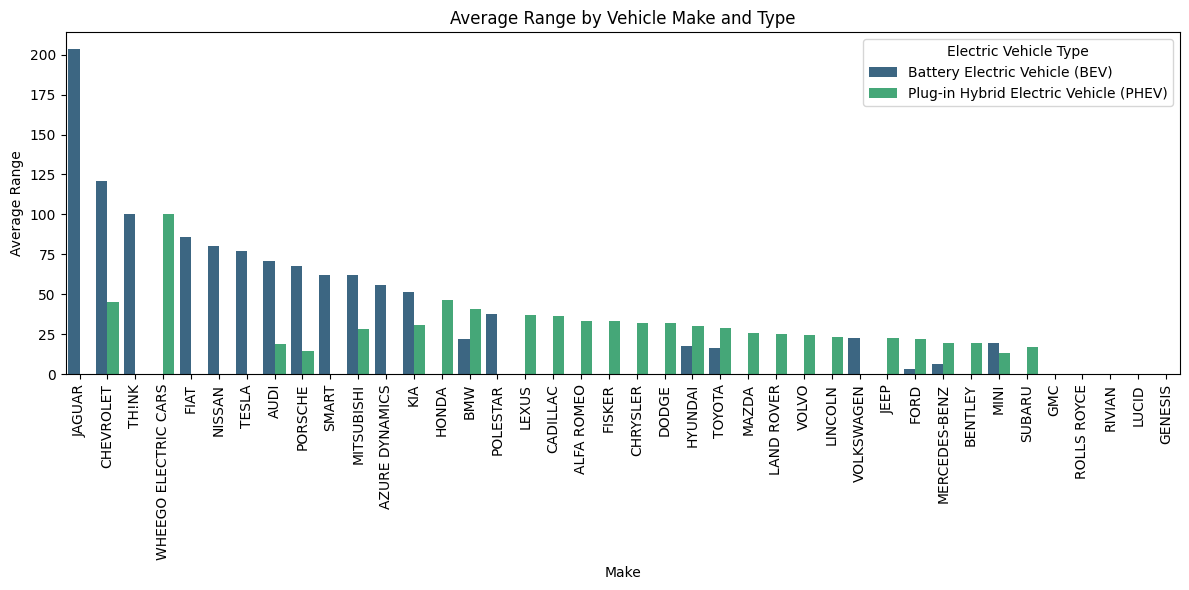

In [ ]:
#Average Range by Vehicle Make and Type

import seaborn as sns
import matplotlib.pyplot as plt

avg_range_by_vehicle = data.groupby(['Make', 'Electric Vehicle Type'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Electric Range', hue='Electric Vehicle Type', data=avg_range_by_vehicle, palette='viridis')
plt.xlabel('Make')
plt.ylabel('Average Range')
plt.title('Average Range by Vehicle Make and Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Electric Vehicle Type', loc='upper right')
plt.show()

#### Everage Range for 10 unique Makes grouped in years


     Model Year         Make  Avg Electric Range
0          1997    CHEVROLET           39.000000
1          1998         FORD           58.000000
2          1999         FORD           74.000000
3          2000         FORD           58.000000
4          2002       TOYOTA           95.000000
..          ...          ...                 ...
247        2024       RIVIAN            0.000000
248        2024  ROLLS ROYCE            0.000000
249        2024        TESLA            0.000000
250        2024       TOYOTA           41.224256
251        2024        VOLVO           28.416185

[252 rows x 3 columns]


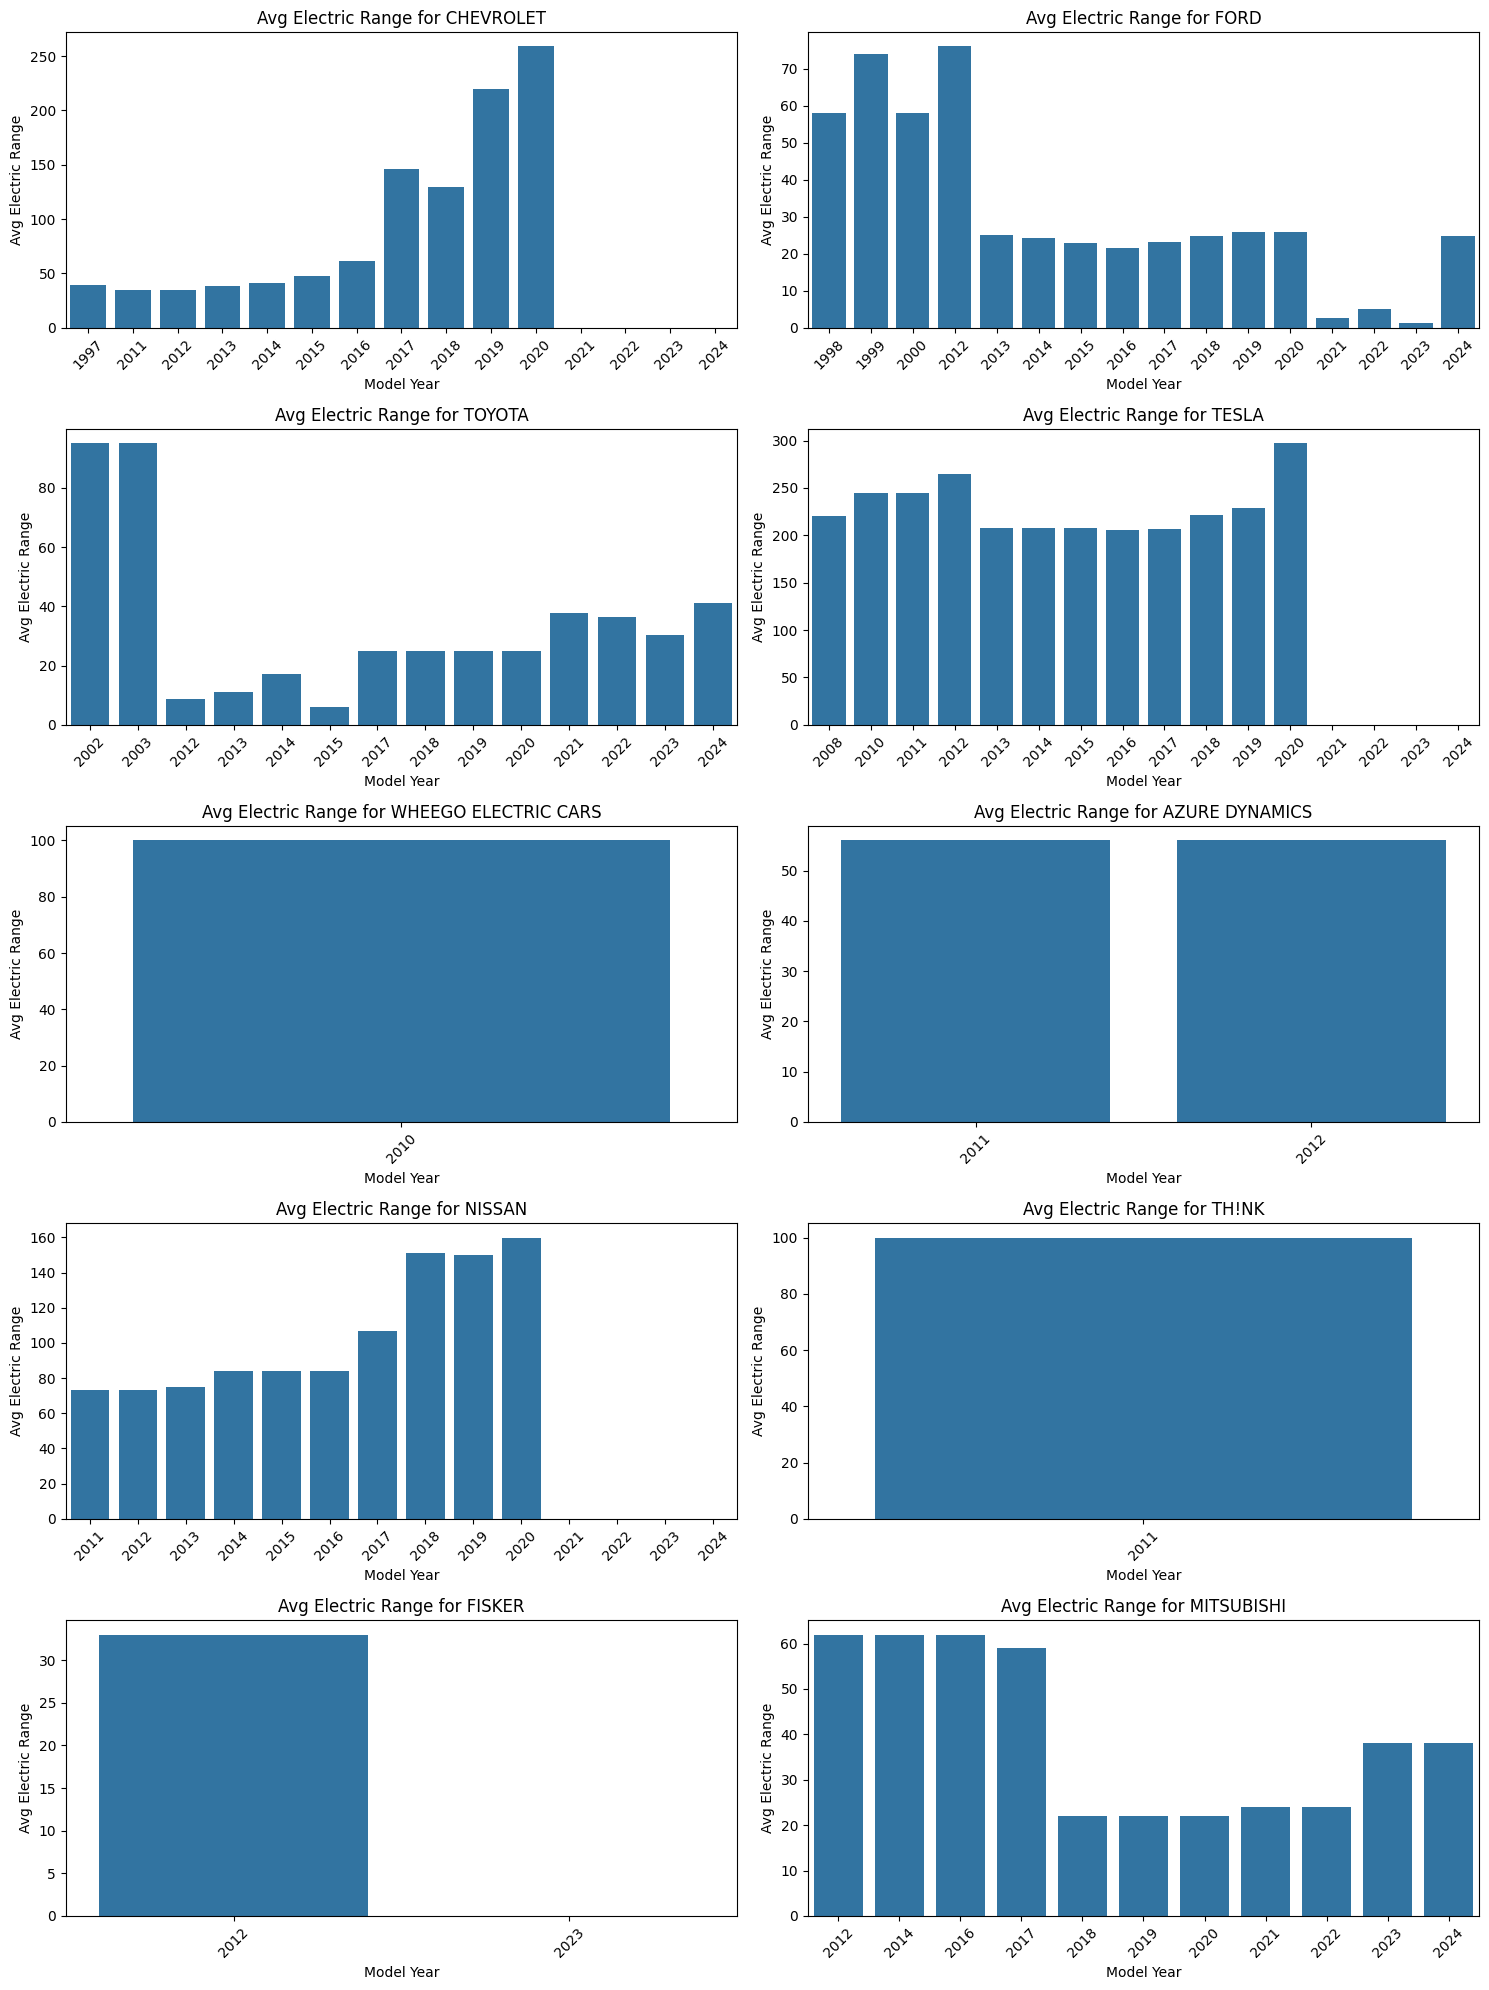

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
avg_range_per_make = data.groupby(["Model Year", "Make"])['Electric Range'].mean().reset_index()
avg_range_per_make.rename(columns={'Electric Range': 'Avg Electric Range'}, inplace=True)
print(avg_range_per_make)
avg_range_per_make.to_csv("avg_range_per_make.csv", index=False)
selected_makes = avg_range_per_make['Make'].unique()[:10]
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, make in enumerate(selected_makes):
    subset = avg_range_per_make[avg_range_per_make['Make'] == make]
    sns.barplot(data=subset, x='Model Year', y='Avg Electric Range', ax=axes[i])
    axes[i].set_title(f'Avg Electric Range for {make}')
    axes[i].set_xlabel('Model Year')
    axes[i].set_ylabel('Avg Electric Range')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()